In [33]:
import pandas as pd

In [34]:
df = pd.read_excel("default of credit card clients.xls")
df.head(5)

,ID,credit_limit,gender,education,marital_status,age,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
import numpy as np

# Assume df is your dataframe with the renamed columns

# ============================================
# PART 1: CREDIT UTILIZATION
# ============================================
# Credit Utilization = (Bill Amount / Credit Limit) * 100

# Calculate utilization for each month
df['utilization_sep'] = (df['bill_amt_sep'] / df['credit_limit']) * 100
df['utilization_aug'] = (df['bill_amt_aug'] / df['credit_limit']) * 100
df['utilization_jul'] = (df['bill_amt_jul'] / df['credit_limit']) * 100
df['utilization_jun'] = (df['bill_amt_jun'] / df['credit_limit']) * 100
df['utilization_may'] = (df['bill_amt_may'] / df['credit_limit']) * 100
df['utilization_apr'] = (df['bill_amt_apr'] / df['credit_limit']) * 100

# Calculate AVERAGE utilization across all 6 months
df['avg_utilization'] = (df['utilization_sep'] + df['utilization_aug'] + 
                          df['utilization_jul'] + df['utilization_jun'] + 
                          df['utilization_may'] + df['utilization_apr']) / 6

# Calculate MAXIMUM utilization (worst month)
df['max_utilization'] = df[['utilization_sep', 'utilization_aug', 'utilization_jul', 
                             'utilization_jun', 'utilization_may', 'utilization_apr']].max(axis=1)


# ============================================
# PART 2: PAYMENT RATIO
# ============================================
# Payment Ratio = (Amount Paid / Bill Amount)

# Calculate payment ratio for each month (avoiding division by zero)
df['payment_ratio_sep'] = df['pay_amt_sep'] / df['bill_amt_sep']
df.loc[df['bill_amt_sep'] == 0, 'payment_ratio_sep'] = 0

df['payment_ratio_aug'] = df['pay_amt_aug'] / df['bill_amt_aug']
df.loc[df['bill_amt_aug'] == 0, 'payment_ratio_aug'] = 0

df['payment_ratio_jul'] = df['pay_amt_jul'] / df['bill_amt_jul']
df.loc[df['bill_amt_jul'] == 0, 'payment_ratio_jul'] = 0

df['payment_ratio_jun'] = df['pay_amt_jun'] / df['bill_amt_jun']
df.loc[df['bill_amt_jun'] == 0, 'payment_ratio_jun'] = 0

df['payment_ratio_may'] = df['pay_amt_may'] / df['bill_amt_may']
df.loc[df['bill_amt_may'] == 0, 'payment_ratio_may'] = 0

df['payment_ratio_apr'] = df['pay_amt_apr'] / df['bill_amt_apr']
df.loc[df['bill_amt_apr'] == 0, 'payment_ratio_apr'] = 0

# Calculate AVERAGE payment ratio across all 6 months
df['avg_payment_ratio'] = (df['payment_ratio_sep'] + df['payment_ratio_aug'] + 
                            df['payment_ratio_jul'] + df['payment_ratio_jun'] + 
                            df['payment_ratio_may'] + df['payment_ratio_apr']) / 6

# Calculate MINIMUM payment ratio (worst month)
df['min_payment_ratio'] = df[['payment_ratio_sep', 'payment_ratio_aug', 'payment_ratio_jul',
                               'payment_ratio_jun', 'payment_ratio_may', 'payment_ratio_apr']].min(axis=1)


# ============================================
# CLEAN UP - Drop the intermediate columns
# ============================================
# We only need the 4 final features, so drop the monthly calculations
columns_to_drop = ['utilization_sep', 'utilization_aug', 'utilization_jul', 
                   'utilization_jun', 'utilization_may', 'utilization_apr',
                   'payment_ratio_sep', 'payment_ratio_aug', 'payment_ratio_jul',
                   'payment_ratio_jun', 'payment_ratio_may', 'payment_ratio_apr']

df = df.drop(columns=columns_to_drop)


# ============================================
# DISPLAY RESULTS
# ============================================
print("4 New Features Created:")
print("="*60)
print(df[['avg_utilization', 'max_utilization', 
          'avg_payment_ratio', 'min_payment_ratio']].head())
print("\n")

# Show summary statistics
print("Summary Statistics:")
print("="*60)
print(df[['avg_utilization', 'max_utilization', 
          'avg_payment_ratio', 'min_payment_ratio']].describe())


# ============================================
# INTERPRETATION GUIDE
# ============================================
print("\n\nHOW TO INTERPRET THESE FEATURES:")
print("="*60)
print("\nAVG_UTILIZATION & MAX_UTILIZATION:")
print("  0-30%   = Low usage (GOOD - customer is not stretched)")
print("  30-50%  = Moderate usage (OK)")
print("  50-80%  = High usage (WARNING - possible financial stress)")
print("  80-100% = Maxed out (BAD - very high default risk)")

print("\nAVG_PAYMENT_RATIO & MIN_PAYMENT_RATIO:")
print("  1.0+    = Paying in full or more (EXCELLENT)")
print("  0.5-1.0 = Paying partial amounts (OK but debt growing)")
print("  0.1-0.5 = Minimum payments only (BAD - debt accumulating)")
print("  0.0     = No payment made (VERY BAD - default likely)")

4 New Features Created:
   avg_utilization  max_utilization  avg_payment_ratio  min_payment_ratio
0         6.420000        19.565000           0.037019           0.000000
1         2.371806         2.879167           0.311916           0.000000
2        18.824630        32.487778           0.115141           0.051917
3        77.111333        98.582000           0.036396           0.024345
4        36.446333        71.670000           1.246958           0.035492


Summary Statistics:
       avg_utilization  max_utilization  avg_payment_ratio  min_payment_ratio
count     30000.000000     30000.000000       30000.000000       30000.000000
mean         37.304795        49.496489          -2.148846         -20.963255
std          35.188994        43.304617         114.502208         664.988355
min         -23.259000       -10.000000      -13727.477930      -82150.000000
25%           2.999701         7.063631           0.037628           0.000000
50%          28.483403        43.070230   

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

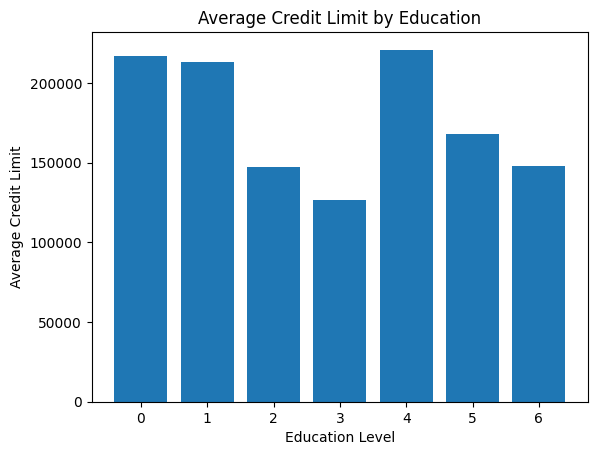

In [37]:
# Group by education and take the mean credit limit
avg_credit = df.groupby('education')['credit_limit'].mean()

plt.bar(avg_credit.index, avg_credit.values)
plt.xlabel("Education Level")
plt.ylabel("Average Credit Limit")
plt.title("Average Credit Limit by Education")
plt.show()


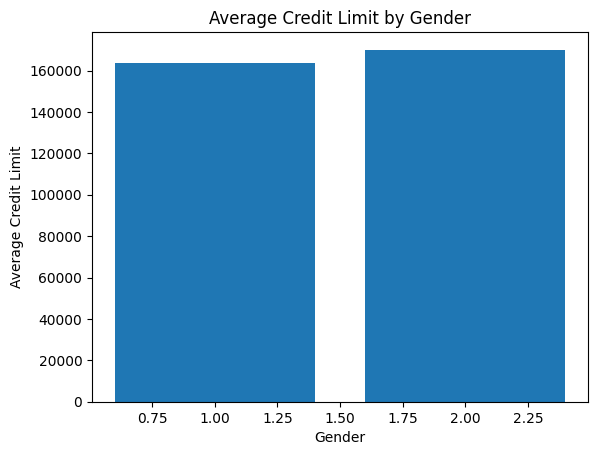

In [38]:
# Group by education and take the mean credit limit
avg_credit = df.groupby('gender')['credit_limit'].mean()

plt.bar(avg_credit.index, avg_credit.values)
plt.xlabel("Gender")
plt.ylabel("Average Credit Limit")
plt.title("Average Credit Limit by Gender")
plt.show()

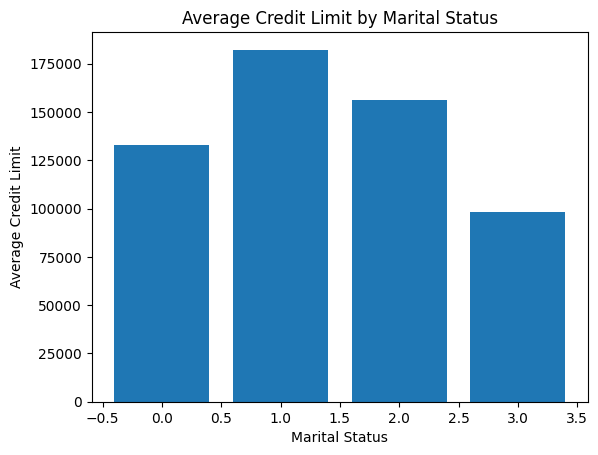

In [39]:
# Group by education and take the mean credit limit
avg_credit = df.groupby('marital_status')['credit_limit'].mean()

plt.bar(avg_credit.index, avg_credit.values)
plt.xlabel("Marital Status")
plt.ylabel("Average Credit Limit")
plt.title("Average Credit Limit by Marital Status")
plt.show()

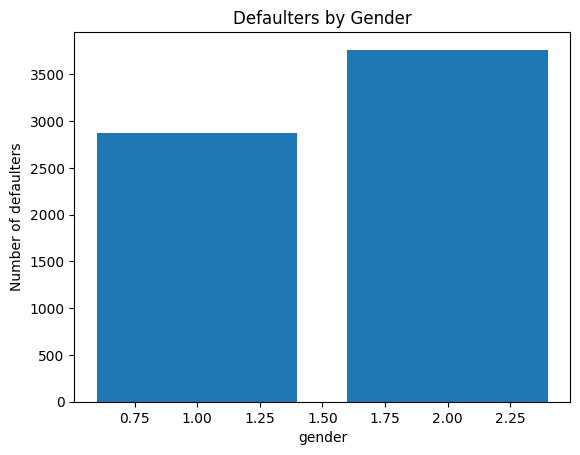

In [40]:
# Group by education and take the mean credit limit
avg_credit = df.groupby('gender')['default payment next month'].sum()

plt.bar(avg_credit.index, avg_credit.values)
plt.xlabel("gender")
plt.ylabel("Number of defaulters")
plt.title("Defaulters by Gender")
plt.show()

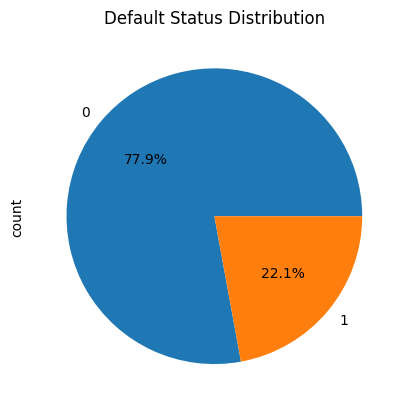

In [41]:
df["default payment next month"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Default Status Distribution")
plt.show()

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(['default payment next month', 'ID'], axis=1)
y = df['default payment next month']

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply SMOTE ONLY on training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [43]:
print(f"Original training set class distribution:\n{y_train.value_counts()}\n")
print(f"SMOTE balanced training set class distribution:\n{pd.Series(y_train_res).value_counts()}")

Original training set class distribution:
default payment next month
0    18677
1     5323
Name: count, dtype: int64

SMOTE balanced training set class distribution:
default payment next month
0    18677
1    18677
Name: count, dtype: int64


In [44]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import shap
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train_res)
pred_lr = lr.predict_proba(X_test_scaled)[:, 1]
auc_lr = roc_auc_score(y_test, pred_lr)

In [47]:
# Model 2: Random Forest
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_leaf=50,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train_res)
pred_rf = rf.predict_proba(X_test_scaled)[:, 1]
auc_rf = roc_auc_score(y_test, pred_rf)

In [48]:
# Model 3: XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='auc',
    n_jobs=-1,
    verbosity=0
)
xgb_model.fit(X_train_scaled, y_train_res)
pred_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
auc_xgb = roc_auc_score(y_test, pred_xgb)

In [49]:
print("="*60)
print(f"{'Model':<25} {'AUC Score'}")
print("="*60)
print(f"{'Logistic Regression':<25} {auc_lr:.4f}")
print(f"{'Random Forest':<25} {auc_rf:.4f}")
print(f"{'XGBoost':<25} {auc_xgb:.4f}")
print("="*60)

Model                     AUC Score
Logistic Regression       0.7023
Random Forest             0.7643
XGBoost                   0.7549


In [50]:
# Pick the best one automatically
best_name = max({'LR': auc_lr, 'RF': auc_rf, 'XGB': auc_xgb}.items(), key=lambda x: x[1])[0]
best_auc  = max(auc_lr, auc_rf, auc_xgb)
print(f"Winner: {best_name} with AUC = {best_auc:.4f}")

Winner: RF with AUC = 0.7643


AUC       : 0.7643
Gini      : 0.5285   ← This is what banks report internally!

KS Statistic : 0.4103   ← Excellent if > 0.40
KS p-value   : 1.49e-155

--- At 5% Approval Rate (Top 5% safest customers) ---
Approved customers      : 300
Default rate in approved:   3.67%   ← Key business metric!
Overall portfolio default rate: 21.88%
Bad rate reduction      :  83.2%
Recall (bad capture rate in rejected):   0.8%

--- At 10% Approval Rate (Top 10% safest customers) ---
Approved customers      : 600
Default rate in approved:   4.50%   ← Key business metric!
Overall portfolio default rate: 21.88%
Bad rate reduction      :  79.4%
Recall (bad capture rate in rejected):   2.1%



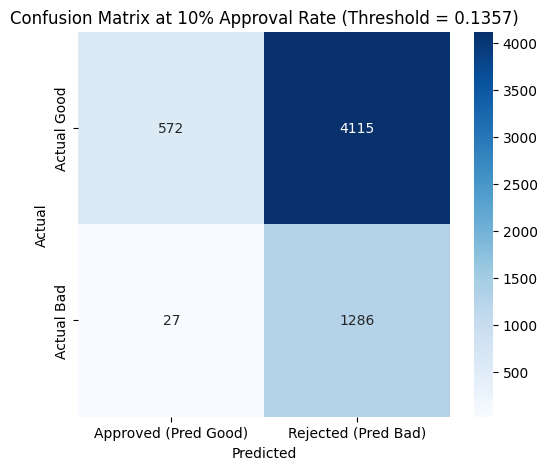

In [51]:
# ================================================================
# PROFESSIONAL CREDIT RISK EVALUATION (Gini + KS + Cutoff Analysis)
# ================================================================

from scipy.stats import ks_2samp

# Assume you have:
# best_pred_proba = your best model's predict_proba(X_test)[:, 1]
# y_test          = true labels

# Example (replace with your actual best model prediction):
best_pred_proba = pred_rf

# 1. Gini Coefficient (very common in banking - same as 2*AUC - 1)
auc = roc_auc_score(y_test, best_pred_proba)
gini = 2 * auc - 1
print(f"AUC       : {auc:.4f}")
print(f"Gini      : {gini:.4f}   ← This is what banks report internally!\n")

# 2. Kolmogorov-Smirnov (KS) - measures separation between good/bad
# Higher = better separation (typical good model: KS > 0.30–0.45)
ks_stat, p_value = ks_2samp(
    best_pred_proba[y_test == 0],   # scores of good customers
    best_pred_proba[y_test == 1]    # scores of bad customers
)
print(f"KS Statistic : {ks_stat:.4f}   ← Excellent if > 0.40")
print(f"KS p-value   : {p_value:.2e}\n")

# 3. Find optimal cutoff? Or just evaluate at 5% and 10% approval rate
# Banks often fix approval rate (e.g., top 90% lowest risk = approve)
df_scores = pd.DataFrame({
    'true': y_test.values,
    'prob_default': best_pred_proba
})

# Sort by predicted probability (lower score = lower risk)
df_scores = df_scores.sort_values('prob_default', ascending=True).reset_index(drop=True)

total_customers = len(df_scores)

# Evaluate at 5% and 10% cutoff (meaning we approve the 5% or 10% safest customers)
for cutoff_pct in [5, 10]:
    approve_n = int(total_customers * cutoff_pct / 100)
    approved = df_scores.iloc[:approve_n]
    rejected = df_scores.iloc[approve_n:]
    
    # Default rate in approved book (this is what the business cares about!)
    approved_default_rate = approved['true'].mean()
    overall_default_rate = df_scores['true'].mean()
    
    tp = ((approved['true'] == 1) & (approved['true'] == 1)).sum()  # not used directly
    fp = (approved['true'] == 1).sum()
    fn = (rejected['true'] == 1).sum()
    tn = (rejected['true'] == 0).sum()
    
    precision = 0 if (fp + tp) == 0 else tp / (fp + tp)  # not super meaningful here
    recall = fp / (fp + fn) if (fp + fn) > 0 else 0
    
    print(f"--- At {cutoff_pct}% Approval Rate (Top {cutoff_pct}% safest customers) ---")
    print(f"Approved customers      : {approve_n:,}")
    print(f"Default rate in approved: {approved_default_rate*100:6.2f}%   ← Key business metric!")
    print(f"Overall portfolio default rate: {overall_default_rate*100:.2f}%")
    print(f"Bad rate reduction      : {((overall_default_rate - approved_default_rate)/overall_default_rate)*100:5.1f}%")
    print(f"Recall (bad capture rate in rejected): {recall*100:5.1f}%\n")

# 4. Bonus: Pretty Confusion Matrix at 10% cutoff
cutoff_pct = 10
approve_n = int(total_customers * cutoff_pct / 100)
threshold_score = df_scores.iloc[approve_n - 1]['prob_default']  # score of the last approved

y_pred_cutoff = (best_pred_proba >= threshold_score).astype(int)  # 1 = reject, 0 = approve

cm = confusion_matrix(y_test, y_pred_cutoff)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Approved (Pred Good)', 'Rejected (Pred Bad)'],
            yticklabels=['Actual Good', 'Actual Bad'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix at {cutoff_pct}% Approval Rate (Threshold = {threshold_score:.4f})')
plt.show()

In [58]:
# Save the champion model for Streamlit later
import joblib
joblib.dump(xgb_model if best_name == 'XGB' else rf if best_name == 'RF' else lr, 'best_credit_risk_model.pkl')
print("Best model saved as 'best_credit_risk_model.pkl'")

Best model saved as 'best_credit_risk_model.pkl'
